# Weather Prediction with Random Forest

import pandas as pd
global_temp = pd.read_csv("C:/Users/Muhamad/ML_Text_Analytics/Weather_Prediction/GlobalTemp.csv")
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull().sum())

In [2]:
def converttemp(x):
    x = (x * 1.8) + 32
    return float(x)

In [3]:
#Data Preparation
def wrangle(df):
    df = df.copy()
    df = df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
    df["LandAverageTemperature"] = df["LandAverageTemperature"].apply(converttemp)
    df["LandMaxTemperature"] = df["LandMaxTemperature"].apply(converttemp)
    df["LandMinTemperature"] = df["LandMinTemperature"].apply(converttemp)
    df["LandAndOceanAverageTemperature"] = df["LandAndOceanAverageTemperature"].apply(converttemp)
    df["dt"] = pd.to_datetime(df["dt"])
    df["Month"] = df["dt"].dt.month
    df["Year"] = df["dt"].dt.year
    df = df.drop("dt", axis=1)
    df = df.drop("Month", axis=1)
    df = df.set_index(["Year"])
    df = df.dropna()
    return df
global_temp = wrangle(global_temp)
print(global_temp.head(20))
    

      LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
Year                                                                   
1850                 33.3482             46.8356             26.2292   
1850                 37.5278             49.9460             27.8762   
1850                 40.9172             50.6246             28.5710   
1850                 44.9906             55.2812             33.8324   
1850                 50.0072             60.1790             38.8598   
1850                 55.6700             66.1028             44.7908   
1850                 58.0856             66.6194             46.4252   
1850                 57.2702             65.2586             45.3308   
1850                 52.7090             60.5228             40.1594   
1850                 46.5638             55.7402             35.6234   
1850                 40.5194             52.4984             31.7840   
1850                 37.0454             45.4874             26.

In [4]:
print(global_temp.shape)
print(global_temp.columns)
print(global_temp.info())
print(global_temp.isnull().sum())

(1992, 4)
Index(['LandAverageTemperature', 'LandMaxTemperature', 'LandMinTemperature',
       'LandAndOceanAverageTemperature'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1850 to 2015
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LandAverageTemperature          1992 non-null   float64
 1   LandMaxTemperature              1992 non-null   float64
 2   LandMinTemperature              1992 non-null   float64
 3   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(4)
memory usage: 77.8 KB
None
LandAverageTemperature            0
LandMaxTemperature                0
LandMinTemperature                0
LandAndOceanAverageTemperature    0
dtype: int64


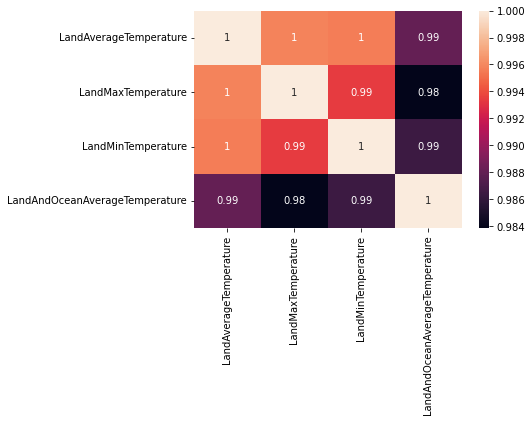

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = global_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:
target = "LandAndOceanAverageTemperature"
y = global_temp[target]
x = global_temp[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.25, random_state=42)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(1494, 3)
(498, 3)
(1494,)
(498,)


In [8]:
from sklearn.metrics import mean_squared_error
ypred = [yval.mean()] * len(yval)
print("Baseline MAE: ", round(mean_squared_error(yval, ypred), 5))

Baseline MAE:  5.14262


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
forest = make_pipeline(
    SelectKBest(k="all"),
    StandardScaler(),
    RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1
    )
)
forest.fit(xtrain, ytrain)

Pipeline(steps=[('selectkbest', SelectKBest(k='all')),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=50, n_jobs=-1,
                                       random_state=77))])

In [11]:
import numpy as np
errors = abs(ypred - yval)
mape = 100 * (errors/ytrain)
accuracy = 100 - np.mean(mape)
print("Random Forest Model: ", round(accuracy, 2), "%")

Random Forest Model:  96.61 %
